## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.9ms	remaining: 48.9s
1:	learn: 0.9301086	total: 51ms	remaining: 25.5s
2:	learn: 0.9005637	total: 53ms	remaining: 17.6s
3:	learn: 0.8720983	total: 55.2ms	remaining: 13.7s
4:	learn: 0.8467410	total: 57.1ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59ms	remaining: 9.77s
6:	learn: 0.7994702	total: 60.9ms	remaining: 8.64s
7:	learn: 0.7784272	total: 62.8ms	remaining: 7.78s
8:	learn: 0.7602192	total: 64.6ms	remaining: 7.12s
9:	learn: 0.7412421	total: 66.7ms	remaining: 6.6s
10:	learn: 0.7247930	total: 69.2ms	remaining: 6.22s
11:	learn: 0.7089951	total: 71.4ms	remaining: 5.88s
12:	learn: 0.6951345	total: 73.3ms	remaining: 5.57s
13:	learn: 0.6809276	total: 75.4ms	remaining: 5.31s
14:	learn: 0.6692630	total: 77.4ms	remaining: 5.08s
15:	learn: 0.6588323	total: 79.3ms	remaining: 4.88s
16:	learn: 0.6472700	total: 81.2ms	remaining: 4.7s
17:	learn: 0.6379982	total: 83.1ms	remaining: 4.54s
18:	learn: 0.6294674	total: 85.1ms	remaining: 4.39s
19:	learn: 0.6193295	total: 87

59:	learn: 0.4824455	total: 165ms	remaining: 2.59s
60:	learn: 0.4809744	total: 167ms	remaining: 2.57s
61:	learn: 0.4801376	total: 169ms	remaining: 2.56s
62:	learn: 0.4792422	total: 171ms	remaining: 2.54s
63:	learn: 0.4780719	total: 173ms	remaining: 2.53s
64:	learn: 0.4771984	total: 175ms	remaining: 2.52s
65:	learn: 0.4759610	total: 177ms	remaining: 2.5s
66:	learn: 0.4750287	total: 179ms	remaining: 2.49s
67:	learn: 0.4740093	total: 181ms	remaining: 2.47s
68:	learn: 0.4732612	total: 182ms	remaining: 2.46s
69:	learn: 0.4727266	total: 184ms	remaining: 2.45s
70:	learn: 0.4716549	total: 186ms	remaining: 2.44s
71:	learn: 0.4709088	total: 188ms	remaining: 2.43s
72:	learn: 0.4697594	total: 190ms	remaining: 2.42s
73:	learn: 0.4690934	total: 192ms	remaining: 2.41s
74:	learn: 0.4680942	total: 194ms	remaining: 2.4s
75:	learn: 0.4672726	total: 196ms	remaining: 2.38s
76:	learn: 0.4664479	total: 198ms	remaining: 2.37s
77:	learn: 0.4656044	total: 201ms	remaining: 2.38s
78:	learn: 0.4645375	total: 203ms

84:	learn: 0.4596603	total: 216ms	remaining: 2.32s
85:	learn: 0.4587835	total: 218ms	remaining: 2.31s
86:	learn: 0.4583577	total: 220ms	remaining: 2.3s
87:	learn: 0.4577999	total: 221ms	remaining: 2.29s
88:	learn: 0.4572657	total: 223ms	remaining: 2.28s
89:	learn: 0.4569360	total: 225ms	remaining: 2.28s
90:	learn: 0.4559969	total: 227ms	remaining: 2.27s
91:	learn: 0.4549716	total: 229ms	remaining: 2.26s
92:	learn: 0.4544919	total: 231ms	remaining: 2.25s
93:	learn: 0.4537693	total: 233ms	remaining: 2.24s
94:	learn: 0.4532673	total: 235ms	remaining: 2.24s
95:	learn: 0.4526987	total: 237ms	remaining: 2.23s
96:	learn: 0.4520952	total: 239ms	remaining: 2.22s
97:	learn: 0.4513919	total: 240ms	remaining: 2.21s
98:	learn: 0.4503747	total: 243ms	remaining: 2.21s
99:	learn: 0.4494783	total: 244ms	remaining: 2.2s
100:	learn: 0.4487329	total: 246ms	remaining: 2.19s
101:	learn: 0.4481325	total: 248ms	remaining: 2.19s
102:	learn: 0.4475445	total: 250ms	remaining: 2.18s
103:	learn: 0.4466014	total: 2

144:	learn: 0.4274087	total: 331ms	remaining: 1.95s
145:	learn: 0.4271984	total: 333ms	remaining: 1.95s
146:	learn: 0.4268458	total: 335ms	remaining: 1.94s
147:	learn: 0.4264987	total: 337ms	remaining: 1.94s
148:	learn: 0.4262192	total: 339ms	remaining: 1.93s
149:	learn: 0.4257966	total: 340ms	remaining: 1.93s
150:	learn: 0.4253062	total: 342ms	remaining: 1.93s
151:	learn: 0.4247446	total: 344ms	remaining: 1.92s
152:	learn: 0.4237365	total: 346ms	remaining: 1.92s
153:	learn: 0.4233079	total: 348ms	remaining: 1.91s
154:	learn: 0.4228876	total: 350ms	remaining: 1.91s
155:	learn: 0.4225404	total: 352ms	remaining: 1.9s
156:	learn: 0.4222831	total: 354ms	remaining: 1.9s
157:	learn: 0.4218088	total: 356ms	remaining: 1.9s
158:	learn: 0.4213239	total: 358ms	remaining: 1.89s
159:	learn: 0.4210022	total: 360ms	remaining: 1.89s
160:	learn: 0.4201256	total: 361ms	remaining: 1.88s
161:	learn: 0.4197073	total: 363ms	remaining: 1.88s
162:	learn: 0.4192052	total: 365ms	remaining: 1.88s
163:	learn: 0.4

170:	learn: 0.4161870	total: 381ms	remaining: 1.85s
171:	learn: 0.4156228	total: 383ms	remaining: 1.84s
172:	learn: 0.4153041	total: 385ms	remaining: 1.84s
173:	learn: 0.4148857	total: 387ms	remaining: 1.84s
174:	learn: 0.4144190	total: 389ms	remaining: 1.83s
175:	learn: 0.4140875	total: 391ms	remaining: 1.83s
176:	learn: 0.4136755	total: 393ms	remaining: 1.83s
177:	learn: 0.4133860	total: 395ms	remaining: 1.82s
178:	learn: 0.4129780	total: 397ms	remaining: 1.82s
179:	learn: 0.4122907	total: 399ms	remaining: 1.81s
180:	learn: 0.4119188	total: 400ms	remaining: 1.81s
181:	learn: 0.4115412	total: 402ms	remaining: 1.81s
182:	learn: 0.4112620	total: 404ms	remaining: 1.8s
183:	learn: 0.4107734	total: 406ms	remaining: 1.8s
184:	learn: 0.4104881	total: 408ms	remaining: 1.8s
185:	learn: 0.4100009	total: 410ms	remaining: 1.79s
186:	learn: 0.4096453	total: 412ms	remaining: 1.79s
187:	learn: 0.4093395	total: 414ms	remaining: 1.79s
188:	learn: 0.4090020	total: 416ms	remaining: 1.78s
189:	learn: 0.4

228:	learn: 0.3963073	total: 497ms	remaining: 1.67s
229:	learn: 0.3960925	total: 499ms	remaining: 1.67s
230:	learn: 0.3957018	total: 501ms	remaining: 1.67s
231:	learn: 0.3954162	total: 503ms	remaining: 1.66s
232:	learn: 0.3951665	total: 505ms	remaining: 1.66s
233:	learn: 0.3949269	total: 507ms	remaining: 1.66s
234:	learn: 0.3945894	total: 509ms	remaining: 1.66s
235:	learn: 0.3944181	total: 511ms	remaining: 1.65s
236:	learn: 0.3941497	total: 513ms	remaining: 1.65s
237:	learn: 0.3939819	total: 515ms	remaining: 1.65s
238:	learn: 0.3938322	total: 517ms	remaining: 1.65s
239:	learn: 0.3935463	total: 519ms	remaining: 1.64s
240:	learn: 0.3933166	total: 521ms	remaining: 1.64s
241:	learn: 0.3930992	total: 522ms	remaining: 1.64s
242:	learn: 0.3928898	total: 524ms	remaining: 1.63s
243:	learn: 0.3926199	total: 526ms	remaining: 1.63s
244:	learn: 0.3923955	total: 528ms	remaining: 1.63s
245:	learn: 0.3922312	total: 530ms	remaining: 1.62s
246:	learn: 0.3919499	total: 532ms	remaining: 1.62s
247:	learn: 

253:	learn: 0.3900274	total: 546ms	remaining: 1.6s
254:	learn: 0.3898171	total: 548ms	remaining: 1.6s
255:	learn: 0.3896180	total: 550ms	remaining: 1.6s
256:	learn: 0.3894251	total: 552ms	remaining: 1.6s
257:	learn: 0.3892139	total: 554ms	remaining: 1.59s
258:	learn: 0.3889352	total: 556ms	remaining: 1.59s
259:	learn: 0.3886531	total: 558ms	remaining: 1.59s
260:	learn: 0.3884539	total: 560ms	remaining: 1.58s
261:	learn: 0.3882459	total: 562ms	remaining: 1.58s
262:	learn: 0.3881101	total: 564ms	remaining: 1.58s
263:	learn: 0.3879324	total: 566ms	remaining: 1.58s
264:	learn: 0.3876861	total: 568ms	remaining: 1.57s
265:	learn: 0.3874255	total: 570ms	remaining: 1.57s
266:	learn: 0.3868515	total: 572ms	remaining: 1.57s
267:	learn: 0.3866114	total: 574ms	remaining: 1.57s
268:	learn: 0.3863119	total: 576ms	remaining: 1.56s
269:	learn: 0.3860579	total: 578ms	remaining: 1.56s
270:	learn: 0.3858830	total: 580ms	remaining: 1.56s
271:	learn: 0.3857050	total: 582ms	remaining: 1.56s
272:	learn: 0.38

313:	learn: 0.3771184	total: 664ms	remaining: 1.45s
314:	learn: 0.3769370	total: 666ms	remaining: 1.45s
315:	learn: 0.3766643	total: 668ms	remaining: 1.45s
316:	learn: 0.3764891	total: 670ms	remaining: 1.44s
317:	learn: 0.3762751	total: 672ms	remaining: 1.44s
318:	learn: 0.3761284	total: 674ms	remaining: 1.44s
319:	learn: 0.3760168	total: 676ms	remaining: 1.44s
320:	learn: 0.3757763	total: 678ms	remaining: 1.43s
321:	learn: 0.3756076	total: 680ms	remaining: 1.43s
322:	learn: 0.3754123	total: 681ms	remaining: 1.43s
323:	learn: 0.3751852	total: 683ms	remaining: 1.43s
324:	learn: 0.3750004	total: 685ms	remaining: 1.42s
325:	learn: 0.3749086	total: 687ms	remaining: 1.42s
326:	learn: 0.3746654	total: 689ms	remaining: 1.42s
327:	learn: 0.3745405	total: 691ms	remaining: 1.42s
328:	learn: 0.3743710	total: 693ms	remaining: 1.41s
329:	learn: 0.3741679	total: 695ms	remaining: 1.41s
330:	learn: 0.3738646	total: 697ms	remaining: 1.41s
331:	learn: 0.3736647	total: 699ms	remaining: 1.41s
332:	learn: 

338:	learn: 0.3722959	total: 714ms	remaining: 1.39s
339:	learn: 0.3720213	total: 716ms	remaining: 1.39s
340:	learn: 0.3718316	total: 717ms	remaining: 1.39s
341:	learn: 0.3716519	total: 720ms	remaining: 1.38s
342:	learn: 0.3714592	total: 721ms	remaining: 1.38s
343:	learn: 0.3713389	total: 723ms	remaining: 1.38s
344:	learn: 0.3711642	total: 725ms	remaining: 1.38s
345:	learn: 0.3709569	total: 727ms	remaining: 1.37s
346:	learn: 0.3708184	total: 729ms	remaining: 1.37s
347:	learn: 0.3705958	total: 731ms	remaining: 1.37s
348:	learn: 0.3703798	total: 733ms	remaining: 1.37s
349:	learn: 0.3701923	total: 735ms	remaining: 1.36s
350:	learn: 0.3700067	total: 737ms	remaining: 1.36s
351:	learn: 0.3698930	total: 739ms	remaining: 1.36s
352:	learn: 0.3697314	total: 741ms	remaining: 1.36s
353:	learn: 0.3695617	total: 743ms	remaining: 1.35s
354:	learn: 0.3694397	total: 744ms	remaining: 1.35s
355:	learn: 0.3692589	total: 746ms	remaining: 1.35s
356:	learn: 0.3691107	total: 748ms	remaining: 1.35s
357:	learn: 

396:	learn: 0.3627743	total: 828ms	remaining: 1.26s
397:	learn: 0.3626747	total: 831ms	remaining: 1.26s
398:	learn: 0.3625881	total: 833ms	remaining: 1.25s
399:	learn: 0.3622963	total: 835ms	remaining: 1.25s
400:	learn: 0.3622314	total: 837ms	remaining: 1.25s
401:	learn: 0.3620143	total: 839ms	remaining: 1.25s
402:	learn: 0.3618403	total: 841ms	remaining: 1.25s
403:	learn: 0.3616747	total: 843ms	remaining: 1.24s
404:	learn: 0.3614255	total: 845ms	remaining: 1.24s
405:	learn: 0.3613607	total: 847ms	remaining: 1.24s
406:	learn: 0.3612875	total: 848ms	remaining: 1.24s
407:	learn: 0.3611516	total: 850ms	remaining: 1.23s
408:	learn: 0.3609621	total: 852ms	remaining: 1.23s
409:	learn: 0.3608193	total: 854ms	remaining: 1.23s
410:	learn: 0.3604920	total: 856ms	remaining: 1.23s
411:	learn: 0.3603038	total: 858ms	remaining: 1.22s
412:	learn: 0.3602055	total: 860ms	remaining: 1.22s
413:	learn: 0.3599094	total: 862ms	remaining: 1.22s
414:	learn: 0.3597887	total: 864ms	remaining: 1.22s
415:	learn: 

422:	learn: 0.3585620	total: 879ms	remaining: 1.2s
423:	learn: 0.3584427	total: 881ms	remaining: 1.2s
424:	learn: 0.3583044	total: 883ms	remaining: 1.2s
425:	learn: 0.3581698	total: 885ms	remaining: 1.19s
426:	learn: 0.3580461	total: 887ms	remaining: 1.19s
427:	learn: 0.3579182	total: 889ms	remaining: 1.19s
428:	learn: 0.3577521	total: 891ms	remaining: 1.19s
429:	learn: 0.3576138	total: 893ms	remaining: 1.18s
430:	learn: 0.3575528	total: 895ms	remaining: 1.18s
431:	learn: 0.3574686	total: 897ms	remaining: 1.18s
432:	learn: 0.3572923	total: 899ms	remaining: 1.18s
433:	learn: 0.3571859	total: 901ms	remaining: 1.18s
434:	learn: 0.3570185	total: 904ms	remaining: 1.17s
435:	learn: 0.3568416	total: 906ms	remaining: 1.17s
436:	learn: 0.3566846	total: 908ms	remaining: 1.17s
437:	learn: 0.3565875	total: 909ms	remaining: 1.17s
438:	learn: 0.3564768	total: 911ms	remaining: 1.16s
439:	learn: 0.3563559	total: 913ms	remaining: 1.16s
440:	learn: 0.3561557	total: 915ms	remaining: 1.16s
441:	learn: 0.3

480:	learn: 0.3505111	total: 994ms	remaining: 1.07s
481:	learn: 0.3503906	total: 996ms	remaining: 1.07s
482:	learn: 0.3501522	total: 998ms	remaining: 1.07s
483:	learn: 0.3500494	total: 1000ms	remaining: 1.06s
484:	learn: 0.3498921	total: 1s	remaining: 1.06s
485:	learn: 0.3497143	total: 1s	remaining: 1.06s
486:	learn: 0.3496172	total: 1s	remaining: 1.06s
487:	learn: 0.3494609	total: 1.01s	remaining: 1.06s
488:	learn: 0.3493200	total: 1.01s	remaining: 1.05s
489:	learn: 0.3491550	total: 1.01s	remaining: 1.05s
490:	learn: 0.3490323	total: 1.01s	remaining: 1.05s
491:	learn: 0.3488767	total: 1.01s	remaining: 1.05s
492:	learn: 0.3487285	total: 1.02s	remaining: 1.05s
493:	learn: 0.3486318	total: 1.02s	remaining: 1.04s
494:	learn: 0.3485016	total: 1.02s	remaining: 1.04s
495:	learn: 0.3484072	total: 1.02s	remaining: 1.04s
496:	learn: 0.3482698	total: 1.02s	remaining: 1.04s
497:	learn: 0.3481630	total: 1.03s	remaining: 1.03s
498:	learn: 0.3480855	total: 1.03s	remaining: 1.03s
499:	learn: 0.347865

506:	learn: 0.3469987	total: 1.04s	remaining: 1.02s
507:	learn: 0.3469000	total: 1.05s	remaining: 1.01s
508:	learn: 0.3467621	total: 1.05s	remaining: 1.01s
509:	learn: 0.3466653	total: 1.05s	remaining: 1.01s
510:	learn: 0.3465795	total: 1.05s	remaining: 1.01s
511:	learn: 0.3464899	total: 1.05s	remaining: 1s
512:	learn: 0.3463711	total: 1.06s	remaining: 1s
513:	learn: 0.3462483	total: 1.06s	remaining: 1s
514:	learn: 0.3460733	total: 1.06s	remaining: 999ms
515:	learn: 0.3459427	total: 1.06s	remaining: 997ms
516:	learn: 0.3458363	total: 1.06s	remaining: 995ms
517:	learn: 0.3456145	total: 1.07s	remaining: 993ms
518:	learn: 0.3455174	total: 1.07s	remaining: 991ms
519:	learn: 0.3453867	total: 1.07s	remaining: 989ms
520:	learn: 0.3453067	total: 1.07s	remaining: 986ms
521:	learn: 0.3451017	total: 1.07s	remaining: 984ms
522:	learn: 0.3449560	total: 1.08s	remaining: 982ms
523:	learn: 0.3448379	total: 1.08s	remaining: 980ms
524:	learn: 0.3447174	total: 1.08s	remaining: 978ms
525:	learn: 0.3446114

565:	learn: 0.3398064	total: 1.16s	remaining: 888ms
566:	learn: 0.3396466	total: 1.16s	remaining: 887ms
567:	learn: 0.3395531	total: 1.16s	remaining: 885ms
568:	learn: 0.3394093	total: 1.17s	remaining: 882ms
569:	learn: 0.3393241	total: 1.17s	remaining: 880ms
570:	learn: 0.3392368	total: 1.17s	remaining: 878ms
571:	learn: 0.3391373	total: 1.17s	remaining: 876ms
572:	learn: 0.3390261	total: 1.17s	remaining: 874ms
573:	learn: 0.3389126	total: 1.17s	remaining: 872ms
574:	learn: 0.3388268	total: 1.18s	remaining: 870ms
575:	learn: 0.3387474	total: 1.18s	remaining: 867ms
576:	learn: 0.3386361	total: 1.18s	remaining: 865ms
577:	learn: 0.3385706	total: 1.18s	remaining: 863ms
578:	learn: 0.3384814	total: 1.18s	remaining: 861ms
579:	learn: 0.3383559	total: 1.19s	remaining: 859ms
580:	learn: 0.3382469	total: 1.19s	remaining: 856ms
581:	learn: 0.3381645	total: 1.19s	remaining: 854ms
582:	learn: 0.3380538	total: 1.19s	remaining: 852ms
583:	learn: 0.3379690	total: 1.19s	remaining: 850ms
584:	learn: 

592:	learn: 0.3371272	total: 1.21s	remaining: 832ms
593:	learn: 0.3370368	total: 1.21s	remaining: 830ms
594:	learn: 0.3368150	total: 1.22s	remaining: 828ms
595:	learn: 0.3367491	total: 1.22s	remaining: 826ms
596:	learn: 0.3366496	total: 1.22s	remaining: 824ms
597:	learn: 0.3365561	total: 1.22s	remaining: 822ms
598:	learn: 0.3364801	total: 1.22s	remaining: 820ms
599:	learn: 0.3363937	total: 1.23s	remaining: 818ms
600:	learn: 0.3363054	total: 1.23s	remaining: 816ms
601:	learn: 0.3361892	total: 1.23s	remaining: 814ms
602:	learn: 0.3360683	total: 1.23s	remaining: 811ms
603:	learn: 0.3359807	total: 1.23s	remaining: 809ms
604:	learn: 0.3359096	total: 1.24s	remaining: 807ms
605:	learn: 0.3358268	total: 1.24s	remaining: 805ms
606:	learn: 0.3356597	total: 1.24s	remaining: 803ms
607:	learn: 0.3355448	total: 1.24s	remaining: 801ms
608:	learn: 0.3354512	total: 1.24s	remaining: 799ms
609:	learn: 0.3353398	total: 1.25s	remaining: 797ms
610:	learn: 0.3352669	total: 1.25s	remaining: 795ms
611:	learn: 

648:	learn: 0.3313829	total: 1.32s	remaining: 717ms
649:	learn: 0.3313125	total: 1.33s	remaining: 715ms
650:	learn: 0.3311735	total: 1.33s	remaining: 713ms
651:	learn: 0.3310386	total: 1.33s	remaining: 711ms
652:	learn: 0.3309129	total: 1.33s	remaining: 709ms
653:	learn: 0.3308321	total: 1.33s	remaining: 707ms
654:	learn: 0.3307342	total: 1.34s	remaining: 704ms
655:	learn: 0.3306809	total: 1.34s	remaining: 702ms
656:	learn: 0.3305729	total: 1.34s	remaining: 700ms
657:	learn: 0.3304900	total: 1.34s	remaining: 698ms
658:	learn: 0.3303842	total: 1.34s	remaining: 696ms
659:	learn: 0.3302235	total: 1.35s	remaining: 694ms
660:	learn: 0.3300983	total: 1.35s	remaining: 692ms
661:	learn: 0.3299994	total: 1.35s	remaining: 690ms
662:	learn: 0.3299184	total: 1.35s	remaining: 688ms
663:	learn: 0.3298189	total: 1.35s	remaining: 686ms
664:	learn: 0.3296970	total: 1.36s	remaining: 683ms
665:	learn: 0.3296671	total: 1.36s	remaining: 681ms
666:	learn: 0.3295999	total: 1.36s	remaining: 679ms
667:	learn: 

675:	learn: 0.3286108	total: 1.38s	remaining: 660ms
676:	learn: 0.3285218	total: 1.38s	remaining: 659ms
677:	learn: 0.3284620	total: 1.38s	remaining: 657ms
678:	learn: 0.3283999	total: 1.39s	remaining: 655ms
679:	learn: 0.3283506	total: 1.39s	remaining: 653ms
680:	learn: 0.3282208	total: 1.39s	remaining: 651ms
681:	learn: 0.3281020	total: 1.39s	remaining: 649ms
682:	learn: 0.3280328	total: 1.39s	remaining: 646ms
683:	learn: 0.3279574	total: 1.39s	remaining: 644ms
684:	learn: 0.3278928	total: 1.4s	remaining: 642ms
685:	learn: 0.3278094	total: 1.4s	remaining: 640ms
686:	learn: 0.3277178	total: 1.4s	remaining: 638ms
687:	learn: 0.3276684	total: 1.4s	remaining: 636ms
688:	learn: 0.3275537	total: 1.4s	remaining: 634ms
689:	learn: 0.3274808	total: 1.41s	remaining: 632ms
690:	learn: 0.3273839	total: 1.41s	remaining: 630ms
691:	learn: 0.3272773	total: 1.41s	remaining: 628ms
692:	learn: 0.3272088	total: 1.41s	remaining: 625ms
693:	learn: 0.3271216	total: 1.41s	remaining: 623ms
694:	learn: 0.327

734:	learn: 0.3234421	total: 1.49s	remaining: 538ms
735:	learn: 0.3233367	total: 1.5s	remaining: 536ms
736:	learn: 0.3232438	total: 1.5s	remaining: 534ms
737:	learn: 0.3231289	total: 1.5s	remaining: 532ms
738:	learn: 0.3230697	total: 1.5s	remaining: 530ms
739:	learn: 0.3229734	total: 1.5s	remaining: 528ms
740:	learn: 0.3228697	total: 1.5s	remaining: 526ms
741:	learn: 0.3227984	total: 1.51s	remaining: 524ms
742:	learn: 0.3226895	total: 1.51s	remaining: 522ms
743:	learn: 0.3225924	total: 1.51s	remaining: 520ms
744:	learn: 0.3225096	total: 1.51s	remaining: 518ms
745:	learn: 0.3224088	total: 1.51s	remaining: 516ms
746:	learn: 0.3223202	total: 1.52s	remaining: 514ms
747:	learn: 0.3222404	total: 1.52s	remaining: 512ms
748:	learn: 0.3221810	total: 1.52s	remaining: 510ms
749:	learn: 0.3221342	total: 1.52s	remaining: 508ms
750:	learn: 0.3220746	total: 1.52s	remaining: 505ms
751:	learn: 0.3219897	total: 1.53s	remaining: 503ms
752:	learn: 0.3218990	total: 1.53s	remaining: 501ms
753:	learn: 0.3218

762:	learn: 0.3209495	total: 1.55s	remaining: 481ms
763:	learn: 0.3208564	total: 1.55s	remaining: 479ms
764:	learn: 0.3207911	total: 1.55s	remaining: 477ms
765:	learn: 0.3206643	total: 1.55s	remaining: 475ms
766:	learn: 0.3205891	total: 1.55s	remaining: 473ms
767:	learn: 0.3204765	total: 1.56s	remaining: 470ms
768:	learn: 0.3203840	total: 1.56s	remaining: 468ms
769:	learn: 0.3203086	total: 1.56s	remaining: 466ms
770:	learn: 0.3202066	total: 1.56s	remaining: 464ms
771:	learn: 0.3200935	total: 1.56s	remaining: 462ms
772:	learn: 0.3200251	total: 1.57s	remaining: 460ms
773:	learn: 0.3199577	total: 1.57s	remaining: 458ms
774:	learn: 0.3198837	total: 1.57s	remaining: 456ms
775:	learn: 0.3198135	total: 1.57s	remaining: 454ms
776:	learn: 0.3197430	total: 1.57s	remaining: 452ms
777:	learn: 0.3196478	total: 1.58s	remaining: 450ms
778:	learn: 0.3194714	total: 1.58s	remaining: 448ms
779:	learn: 0.3194042	total: 1.58s	remaining: 446ms
780:	learn: 0.3193209	total: 1.58s	remaining: 444ms
781:	learn: 

819:	learn: 0.3160986	total: 1.66s	remaining: 364ms
820:	learn: 0.3159951	total: 1.66s	remaining: 362ms
821:	learn: 0.3159403	total: 1.66s	remaining: 360ms
822:	learn: 0.3158160	total: 1.66s	remaining: 358ms
823:	learn: 0.3157523	total: 1.67s	remaining: 356ms
824:	learn: 0.3156673	total: 1.67s	remaining: 354ms
825:	learn: 0.3156288	total: 1.67s	remaining: 352ms
826:	learn: 0.3155257	total: 1.67s	remaining: 350ms
827:	learn: 0.3154546	total: 1.67s	remaining: 348ms
828:	learn: 0.3153664	total: 1.68s	remaining: 346ms
829:	learn: 0.3152896	total: 1.68s	remaining: 344ms
830:	learn: 0.3152050	total: 1.68s	remaining: 342ms
831:	learn: 0.3151385	total: 1.68s	remaining: 340ms
832:	learn: 0.3150922	total: 1.68s	remaining: 338ms
833:	learn: 0.3149588	total: 1.69s	remaining: 336ms
834:	learn: 0.3149074	total: 1.69s	remaining: 334ms
835:	learn: 0.3148291	total: 1.69s	remaining: 331ms
836:	learn: 0.3147707	total: 1.69s	remaining: 329ms
837:	learn: 0.3147022	total: 1.69s	remaining: 327ms
838:	learn: 

846:	learn: 0.3139822	total: 1.71s	remaining: 309ms
847:	learn: 0.3138839	total: 1.72s	remaining: 307ms
848:	learn: 0.3138291	total: 1.72s	remaining: 305ms
849:	learn: 0.3137772	total: 1.72s	remaining: 303ms
850:	learn: 0.3137138	total: 1.72s	remaining: 301ms
851:	learn: 0.3136859	total: 1.72s	remaining: 299ms
852:	learn: 0.3136054	total: 1.73s	remaining: 297ms
853:	learn: 0.3135239	total: 1.73s	remaining: 295ms
854:	learn: 0.3134711	total: 1.73s	remaining: 293ms
855:	learn: 0.3134242	total: 1.73s	remaining: 291ms
856:	learn: 0.3133249	total: 1.73s	remaining: 289ms
857:	learn: 0.3132311	total: 1.74s	remaining: 287ms
858:	learn: 0.3131446	total: 1.74s	remaining: 285ms
859:	learn: 0.3130587	total: 1.74s	remaining: 283ms
860:	learn: 0.3129229	total: 1.74s	remaining: 281ms
861:	learn: 0.3128651	total: 1.74s	remaining: 279ms
862:	learn: 0.3127812	total: 1.75s	remaining: 277ms
863:	learn: 0.3126884	total: 1.75s	remaining: 276ms
864:	learn: 0.3126358	total: 1.75s	remaining: 274ms
865:	learn: 

897:	learn: 0.3101565	total: 1.82s	remaining: 207ms
898:	learn: 0.3100955	total: 1.83s	remaining: 205ms
899:	learn: 0.3100512	total: 1.83s	remaining: 203ms
900:	learn: 0.3100138	total: 1.83s	remaining: 201ms
901:	learn: 0.3099635	total: 1.83s	remaining: 199ms
902:	learn: 0.3098989	total: 1.83s	remaining: 197ms
903:	learn: 0.3098084	total: 1.84s	remaining: 195ms
904:	learn: 0.3097402	total: 1.84s	remaining: 193ms
905:	learn: 0.3096378	total: 1.84s	remaining: 191ms
906:	learn: 0.3095878	total: 1.84s	remaining: 189ms
907:	learn: 0.3095154	total: 1.84s	remaining: 187ms
908:	learn: 0.3094688	total: 1.85s	remaining: 185ms
909:	learn: 0.3093784	total: 1.85s	remaining: 183ms
910:	learn: 0.3093058	total: 1.85s	remaining: 181ms
911:	learn: 0.3092574	total: 1.85s	remaining: 179ms
912:	learn: 0.3092023	total: 1.85s	remaining: 177ms
913:	learn: 0.3091306	total: 1.86s	remaining: 175ms
914:	learn: 0.3090719	total: 1.86s	remaining: 173ms
915:	learn: 0.3090199	total: 1.86s	remaining: 171ms
916:	learn: 

924:	learn: 0.3082889	total: 1.88s	remaining: 152ms
925:	learn: 0.3081901	total: 1.88s	remaining: 150ms
926:	learn: 0.3081106	total: 1.88s	remaining: 148ms
927:	learn: 0.3080422	total: 1.88s	remaining: 146ms
928:	learn: 0.3079770	total: 1.89s	remaining: 144ms
929:	learn: 0.3079316	total: 1.89s	remaining: 142ms
930:	learn: 0.3078660	total: 1.89s	remaining: 140ms
931:	learn: 0.3078147	total: 1.89s	remaining: 138ms
932:	learn: 0.3077165	total: 1.89s	remaining: 136ms
933:	learn: 0.3076207	total: 1.9s	remaining: 134ms
934:	learn: 0.3075333	total: 1.9s	remaining: 132ms
935:	learn: 0.3074829	total: 1.9s	remaining: 130ms
936:	learn: 0.3074088	total: 1.9s	remaining: 128ms
937:	learn: 0.3073356	total: 1.9s	remaining: 126ms
938:	learn: 0.3072158	total: 1.91s	remaining: 124ms
939:	learn: 0.3071693	total: 1.91s	remaining: 122ms
940:	learn: 0.3071043	total: 1.91s	remaining: 120ms
941:	learn: 0.3070506	total: 1.91s	remaining: 118ms
942:	learn: 0.3070046	total: 1.91s	remaining: 116ms
943:	learn: 0.306

980:	learn: 0.3042142	total: 1.99s	remaining: 38.5ms
981:	learn: 0.3041509	total: 1.99s	remaining: 36.5ms
982:	learn: 0.3041077	total: 1.99s	remaining: 34.5ms
983:	learn: 0.3040665	total: 2s	remaining: 32.5ms
984:	learn: 0.3040237	total: 2s	remaining: 30.4ms
985:	learn: 0.3039532	total: 2s	remaining: 28.4ms
986:	learn: 0.3038723	total: 2s	remaining: 26.4ms
987:	learn: 0.3038141	total: 2s	remaining: 24.3ms
988:	learn: 0.3037455	total: 2.01s	remaining: 22.3ms
989:	learn: 0.3036820	total: 2.01s	remaining: 20.3ms
990:	learn: 0.3036165	total: 2.01s	remaining: 18.3ms
991:	learn: 0.3035759	total: 2.01s	remaining: 16.2ms
992:	learn: 0.3035124	total: 2.01s	remaining: 14.2ms
993:	learn: 0.3034295	total: 2.02s	remaining: 12.2ms
994:	learn: 0.3033612	total: 2.02s	remaining: 10.1ms
995:	learn: 0.3033209	total: 2.02s	remaining: 8.11ms
996:	learn: 0.3032659	total: 2.02s	remaining: 6.08ms
997:	learn: 0.3032189	total: 2.02s	remaining: 4.06ms
998:	learn: 0.3031594	total: 2.03s	remaining: 2.03ms
999:	lea

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34065943685482375


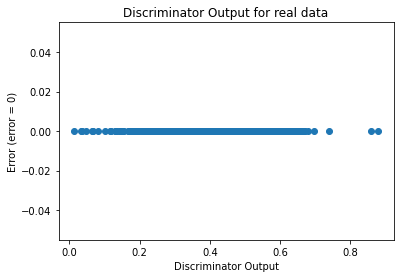

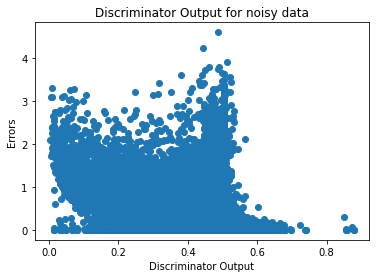

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0863]], device='cuda:0', requires_grad=True)
